In [8]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Chargement données simus

In [160]:
raw_data <- read.csv(file = "data_output_simu_model1.csv", sep=";", header=TRUE)

In [161]:
raw_data <- data.frame(apply(data, 2, function(x) as.numeric(gsub(",", "\\.", x))))


In [162]:
head(raw_data)

,compet,a,t0,k,n_immig,birth_rate,n_alive_0,n_alive_1,n_alive_2,n_alive_3,⋯,smurf_rate_40,smurf_rate_41,smurf_rate_42,smurf_rate_43,smurf_rate_44,smurf_rate_45,smurf_rate_46,smurf_rate_47,smurf_rate_48,smurf_rate_49
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1e-09,0.009,5,0.1911,9,0.20,11,24,44,56,⋯,0.04731093,0.04741749,0.04756255,0.04825355,0.04799968,0.04770286,0.04711322,0.04745980,0.04791597,0.04793107
2,1e-09,0.009,5,0.1911,9,0.30,13,32,62,92,⋯,0.02117354,0.02117420,0.02120635,0.02121020,0.02115683,0.02117830,0.02119744,0.02123151,0.02125735,0.02123238
3,1e-09,0.009,5,0.1911,9,0.01,10,18,25,30,⋯,0.31724138,0.30405405,0.31578947,0.34838710,0.36250000,0.34868421,0.35333333,0.31788079,0.28289474,0.30201342
4,1e-09,0.009,5,0.1911,9,0.10,10,25,37,45,⋯,0.13804071,0.14319952,0.14083710,0.14368727,0.14435042,0.13981043,0.14009662,0.14541751,0.14285714,0.14156408
5,1e-08,0.009,5,0.1911,9,0.20,8,18,31,49,⋯,0.04663551,0.04703636,0.04658443,0.04655338,0.04652484,0.04653951,0.04682450,0.04696081,0.04738669,0.04720543
6,1e-08,0.009,5,0.1911,9,0.30,12,17,39,58,⋯,0.02126222,0.02127169,0.02132842,0.02121148,0.02122239,0.02120061,0.02124435,0.02123613,0.02124817,0.02120884


# Plots

In [163]:
data <- raw_data %>%
  select(-starts_with("age"))

In [164]:
long_data <- data %>%
  pivot_longer(cols = starts_with("n_alive_") | starts_with("smurf_rate_"),
               names_to = "variable",
               values_to = "value") %>%  separate(variable, into = c("measure", "time"), sep = "_rate_|_alive_") 
long_data$time <- as.numeric(long_data$time)
head(long_data)
dim(long_data)

compet,a,t0,k,n_immig,birth_rate,measure,time,value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1e-09,0.009,5,0.1911,9,0.2,n,0,11
1e-09,0.009,5,0.1911,9,0.2,n,1,24
1e-09,0.009,5,0.1911,9,0.2,n,2,44
1e-09,0.009,5,0.1911,9,0.2,n,3,56
1e-09,0.009,5,0.1911,9,0.2,n,4,74
1e-09,0.009,5,0.1911,9,0.2,n,5,94


[1] 4400    9

In [165]:
subset_data <- long_data %>%
  filter(compet == 1e-4,measure=='n')

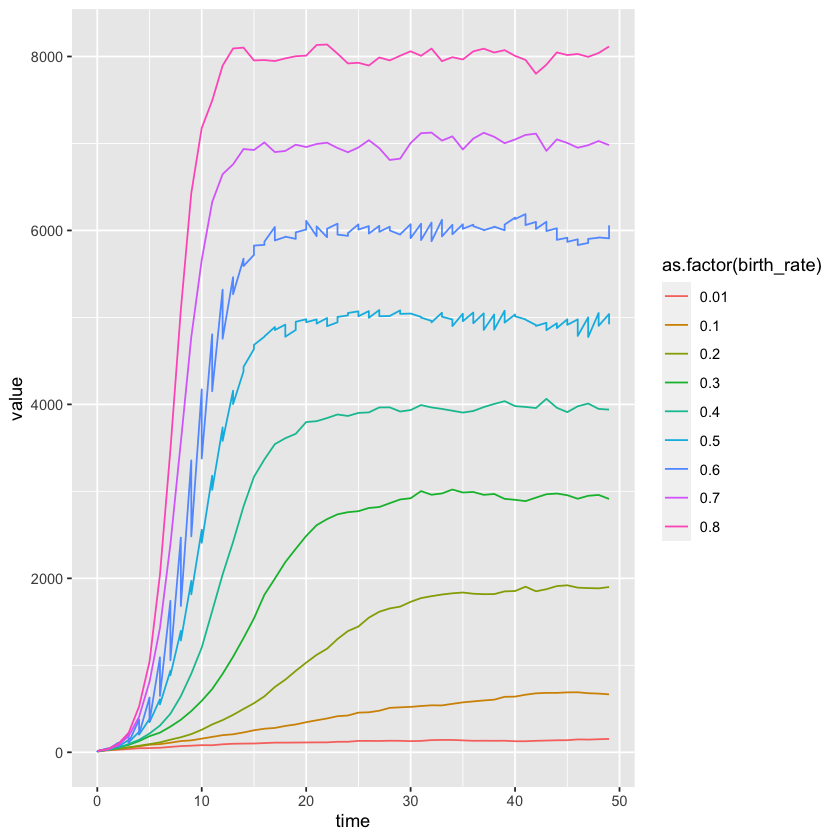

In [166]:
ggplot(subset_data, aes(x = time, y = value, group=birth_rate, color=as.factor(birth_rate)))+ geom_line()

In [167]:
subset_data <- long_data %>%
  filter(compet == 1e-4,measure=='smurf')

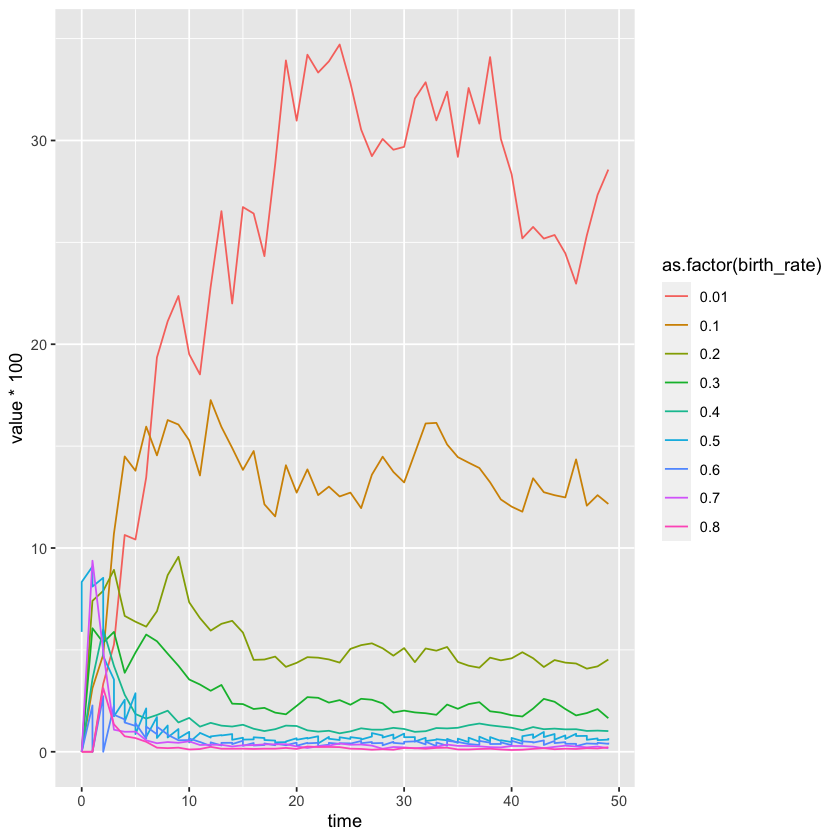

In [168]:
ggplot(subset_data, aes(x = time, y = value*100, group=birth_rate, color=as.factor(birth_rate)))+ geom_line()